In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import pandas as pd

import seaborn as sns
sns.set()

In [2]:
d = 3    # oznitelik sayisi
n = 100   # ornek sayisi

X = np.random.randint(0,100, size = (d,n))
w = np.ones((d,1))
b = 10
y = np.dot(w.T, X) + b

oznitelik_isimleri = ['not'+str(i) for i in range(d)] + ['toplam']
veri = pd.DataFrame(data = np.concatenate((X,y)).T, columns  = oznitelik_isimleri)
veri.shape

(100, 4)

In [3]:
veri.head(3)

,not0,not1,not2,toplam
0,77.0,11.0,0.0,98.0
1,36.0,33.0,61.0,140.0
2,85.0,70.0,15.0,180.0


In [4]:
X = veri.iloc[:, :-1].values
#X = (X - X.mean(axis = 0))/ (X.std(axis = 0)) # normallestirme

y = veri.iloc[:, -1:].values
#y = (y - y.mean(axis = 0))/ (y.std(axis = 0)) # normallestirme

In [5]:
X.shape, y.shape

((100, 3), (100, 1))

In [6]:
X = X.T
y = y.T

X.shape, y.shape

((3, 100), (1, 100))

In [13]:
alpha =  0.00001
Js = []
w  = np.random.rand(X.shape[0],1) 
b = np.random.rand() 

for i in range(100000):
    # forward propagate
    h = np.dot(w.T, X) + b
    # back propagate
    dw = (1 / n) * np.dot(X, (h - y).T)
    db = (1 / n) * np.sum(h - y)
    
    w = w - alpha * dw
    b = b - alpha * db
    
    Js.append((1 / (2 * n)) * np.sum(np.power(h - y,2)))
    
print("w: {}\nb:{}".format(w,b))

w: [[1.0603944 ]
 [1.05068251]
 [1.05740402]]
b:1.4348164102864258


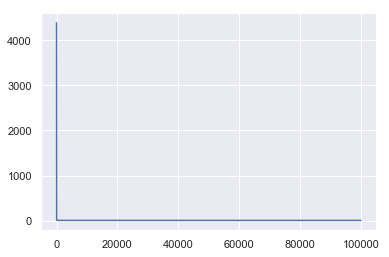

In [14]:
plt.plot(Js)
#Js

In [15]:
h = np.dot(w.T, X) + b
h

array([[ 94.64269306, 138.78318304, 180.97717672, 111.33018462,
        187.60758061, 189.29808317, 103.9650366 , 202.16402251,
        102.48634487,  91.3605776 , 119.89564385, 124.0117076 ,
        221.23990099, 164.40076866, 112.48481716, 143.2780654 ,
        109.04733882, 115.62926545, 140.90912967, 207.53172814,
        111.32206381, 191.5832334 , 180.29090986, 216.14111057,
        200.8264551 , 139.55532064, 170.17603185,  88.84914566,
        152.13127512, 190.2839372 , 231.58025202,  97.53540029,
        196.67982897, 139.55304361, 152.35687089, 159.90824553,
        152.40995702, 175.62206378,  66.06433477, 191.27322098,
        113.3621397 , 100.44843643, 150.62752076, 150.52683509,
        117.9332631 , 204.28407057, 126.9665543 ,  96.59898345,
        197.97031841, 194.58079578, 103.7207852 , 124.95180077,
        105.89161496, 194.72713272, 166.04419325, 104.65717463,
        158.90005953, 141.09755114, 139.64783071, 100.96237119,
        156.54385348, 160.19054897, 164.

In [16]:
y

array([[ 98., 140., 180., 114., 186., 188., 107., 200., 106.,  95., 122.,
        126., 218., 164., 115., 144., 112., 118., 142., 205., 114., 190.,
        179., 213., 199., 141., 170.,  93., 153., 189., 228., 101., 195.,
        141., 153., 160., 153., 175.,  71., 190., 116., 104., 151., 151.,
        120., 202., 129., 100., 196., 193., 107., 127., 109., 193., 166.,
        108., 159., 142., 141., 104., 157., 160., 165.,  88.,  99.,  99.,
        230., 126., 218., 172.,  37.,  89., 176., 111., 129.,  73., 122.,
        127., 138., 170., 181., 119., 146., 159., 204., 169., 182., 175.,
        108., 226., 202., 160., 116., 162., 214., 255., 202., 137., 189.,
        108.]])

In [17]:
h-y

array([[-3.35730694, -1.21681696,  0.97717672, -2.66981538,  1.60758061,
         1.29808317, -3.0349634 ,  2.16402251, -3.51365513, -3.6394224 ,
        -2.10435615, -1.9882924 ,  3.23990099,  0.40076866, -2.51518284,
        -0.7219346 , -2.95266118, -2.37073455, -1.09087033,  2.53172814,
        -2.67793619,  1.5832334 ,  1.29090986,  3.14111057,  1.8264551 ,
        -1.44467936,  0.17603185, -4.15085434, -0.86872488,  1.2839372 ,
         3.58025202, -3.46459971,  1.67982897, -1.44695639, -0.64312911,
        -0.09175447, -0.59004298,  0.62206378, -4.93566523,  1.27322098,
        -2.6378603 , -3.55156357, -0.37247924, -0.47316491, -2.0667369 ,
         2.28407057, -2.0334457 , -3.40101655,  1.97031841,  1.58079578,
        -3.2792148 , -2.04819923, -3.10838504,  1.72713272,  0.04419325,
        -3.34282537, -0.09994047, -0.90244886, -1.35216929, -3.03762881,
        -0.45614652,  0.19054897, -0.14914987, -4.38934238, -3.21474553,
        -3.45243981,  3.58661076, -1.72829354,  2.9

In [18]:
np.mean(np.abs(h-y))

2.055137594496031